In [1]:
import os
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..', '..', 'data')
pth_in = os.path.join(pth, 'modeling', 'predict')
pth_out = os.path.join(pth, 'cancer')

In [3]:
name, cat = 'Tirosh2016', 'Skin'
adata = sc.read_h5ad(os.path.join(pth_in, 'CCCA.h5ad'))
adata = adata[adata.obs.Name == f'Data_{name}_{cat}'].copy()
adata

AnnData object with n_obs × n_vars = 1257 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores',

In [7]:
sc.pp.pca(adata, n_comps = 5)
sce.pp.harmony_integrate(adata, 'sample', theta = 50)

2026-01-10 18:42:03,971 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2026-01-10 18:42:04,157 - harmonypy - INFO - sklearn.KMeans initialization complete.
2026-01-10 18:42:04,161 - harmonypy - INFO - Iteration 1 of 10


2026-01-10 18:42:04,302 - harmonypy - INFO - Iteration 2 of 10
2026-01-10 18:42:04,440 - harmonypy - INFO - Iteration 3 of 10
2026-01-10 18:42:04,575 - harmonypy - INFO - Iteration 4 of 10
2026-01-10 18:42:04,713 - harmonypy - INFO - Converged after 4 iterations


In [10]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony', n_neighbors = 100)
sc.tl.umap(adata)

In [ ]:
adata = adata[adata.obsm['X_umap'][:, 1] < 10].copy()
adata

AnnData object with n_obs × n_vars = 1241 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores',

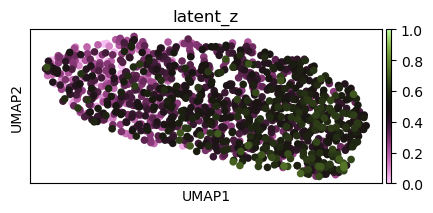

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (5, 2))
sc.pl.umap(adata, color = 'latent_z', size = 120,
           vmin = 0, vmax = 1, cmap = 'vanimo',
           ax = ax)
plt.show()

In [16]:
adata.write(os.path.join(pth_out, f'{name}.h5ad'))